In [1]:
import h5py
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")

from scipy import stats

import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_genomic_disruption_profile_data

2024-07-23 10:30:47.178581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 10:30:47.178676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 10:30:47.228687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 10:30:47.364099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 10:30:49.552337: W tensorflow/compiler/tf2

In [2]:
genome_fragment="chr1.0"
mouse_target=0
human_target=1
mouse_head=1
human_head=0

In [3]:
df = read_genomic_disruption_profile_data(genome_fragment="chr1.0",
                                          mouse_target=0,
                                          human_target=1,
                                          mouse_head=1,
                                          human_head=0,
                                         columns_to_keep = ["chr", "start", "end", "perm_start", "perm_end", "genome_window_start"])

In [4]:
window0 = df[df["genomic_window_id"] == 0]
window1 = df[df["genomic_window_id"] == 1]

# Window 0

## Human - models 0-3

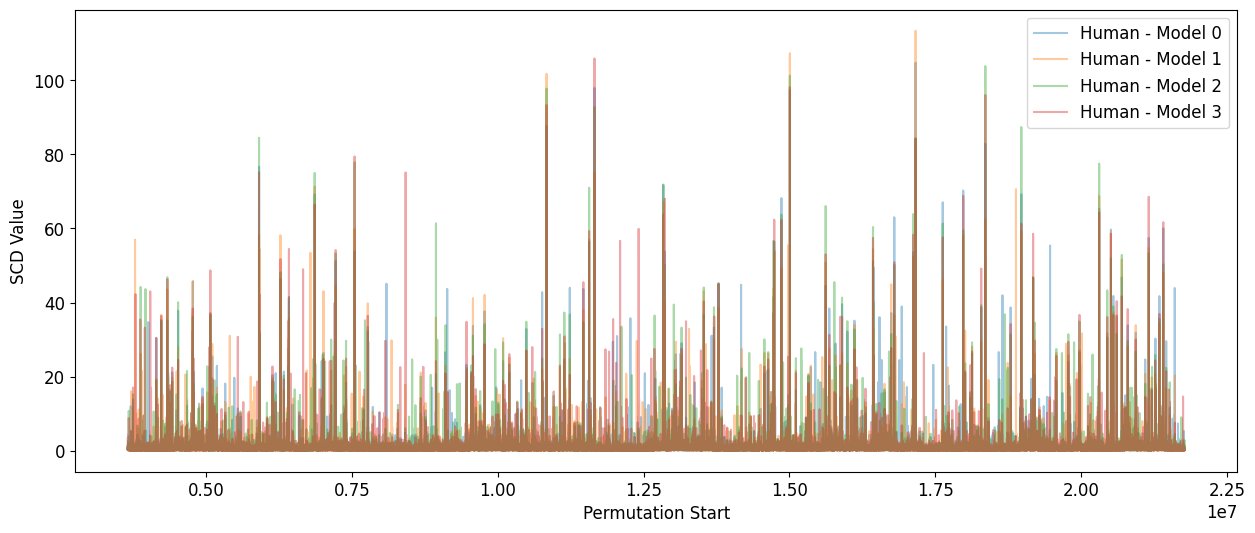

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(window0["perm_start"], window0[f"SCD_h{human_head}_m0_t{human_target}"], alpha=0.4, label='Human - Model 0')
plt.plot(window0["perm_start"], window0[f"SCD_h{human_head}_m1_t{human_target}"], alpha=0.4, label='Human - Model 1')
plt.plot(window0["perm_start"], window0[f"SCD_h{human_head}_m2_t{human_target}"], alpha=0.4, label='Human - Model 2')
plt.plot(window0["perm_start"], window0[f"SCD_h{human_head}_m3_t{human_target}"], alpha=0.4, label='Human - Model 3')

plt.xlabel("Permutation Start")
plt.ylabel("SCD Value")
plt.legend()
plt.show()

Text(0.5, 0.98, 'Correlations of Disruption Score between models')

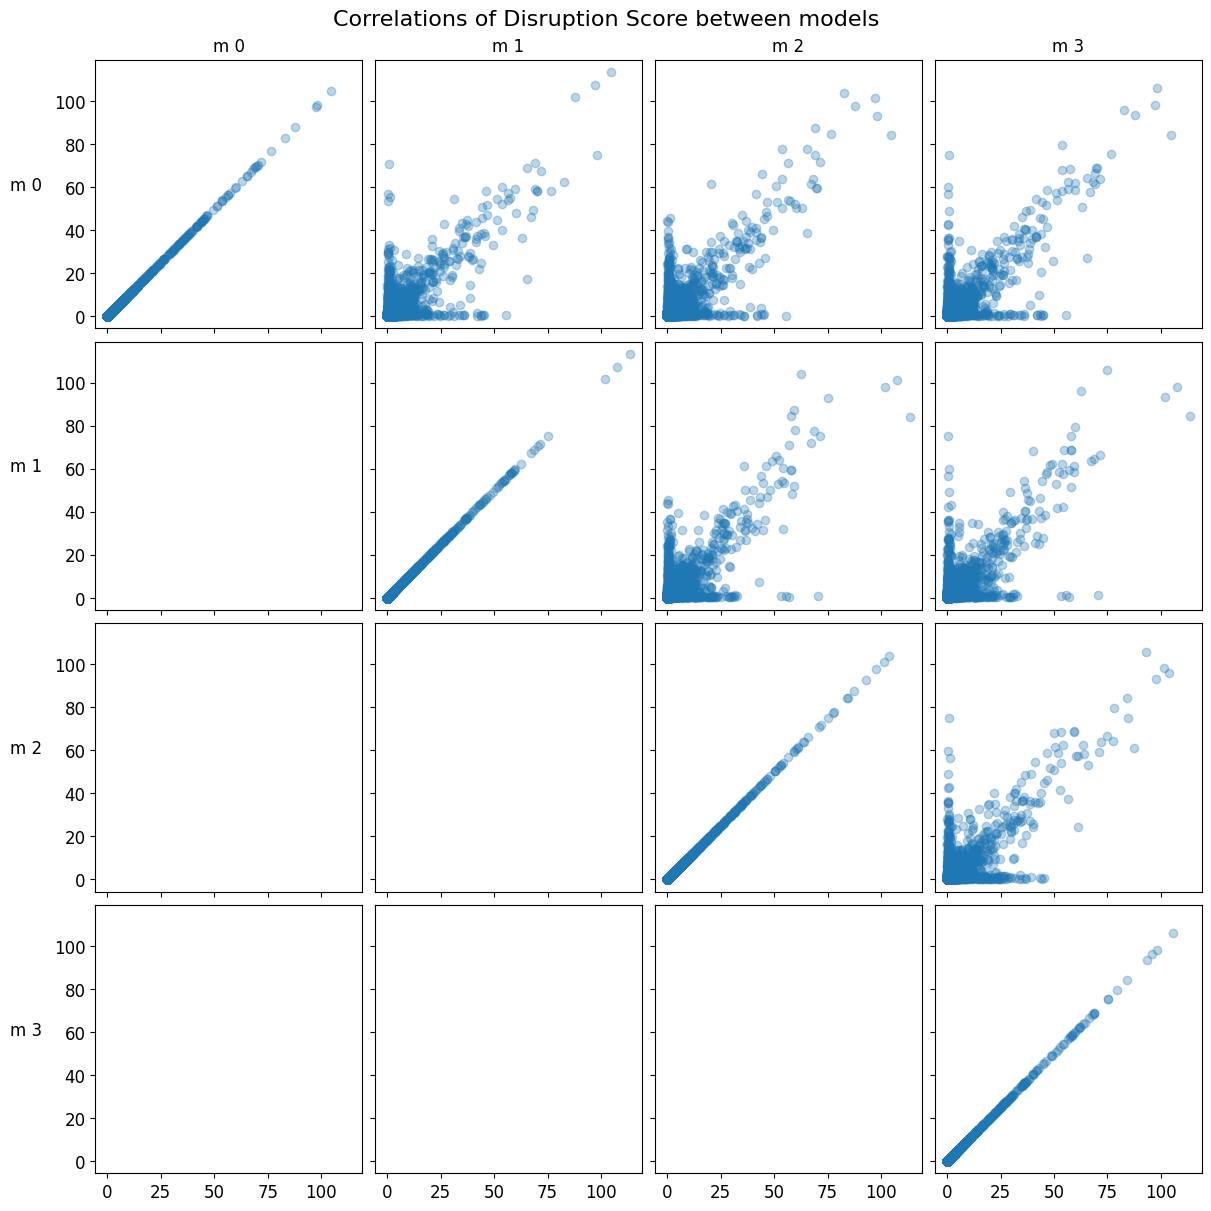

In [6]:
num_models = 4
models_corr_summary = np.zeros((num_models,num_models))

fig, axs = plt.subplots(num_models, num_models, figsize=(12, 12), sharex=True, sharey=True, layout="constrained")

for model_index_x in range(num_models):
    for model_index_y in range(num_models):
        if (model_index_y >= model_index_x):
            
            stat_x = np.array(window0[f"SCD_h{human_head}_m{model_index_x}_t{human_target}"])
            stat_y = np.array(window0[f"SCD_h{human_head}_m{model_index_y}_t{human_target}"])
            
            axs[model_index_x, model_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            models_corr_summary[model_index_x, model_index_y] = models_corr_summary[model_index_y, model_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"m {i}" for i in range(num_models)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of Disruption Score between models", fontsize=16)

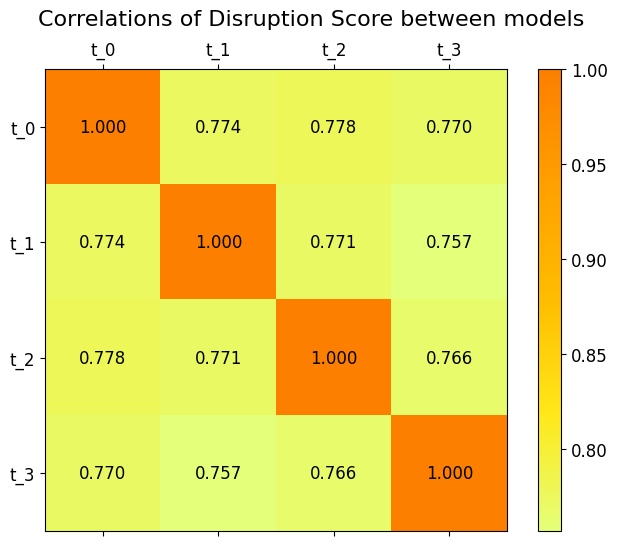

In [7]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(models_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_models)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(models_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle(f"Correlations of Disruption Score between models", fontsize=16)

fig.show()

## Mouse - models 0-3

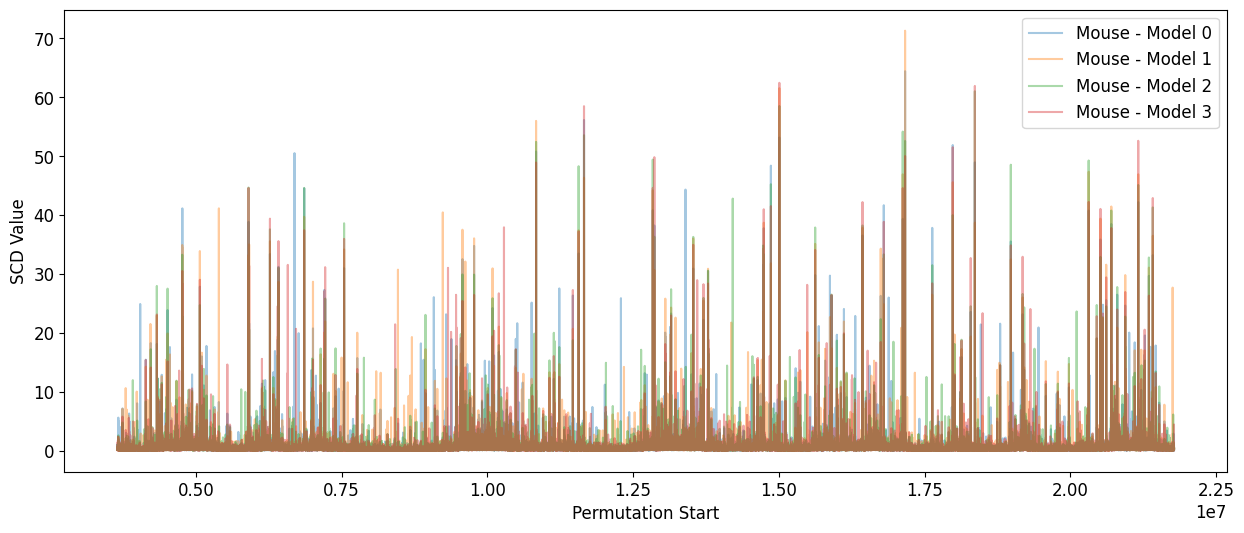

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(window0["perm_start"], window0[f"SCD_h{mouse_head}_m0_t{mouse_target}"], alpha=0.4, label='Mouse - Model 0')
plt.plot(window0["perm_start"], window0[f"SCD_h{mouse_head}_m1_t{mouse_target}"], alpha=0.4, label='Mouse - Model 1')
plt.plot(window0["perm_start"], window0[f"SCD_h{mouse_head}_m2_t{mouse_target}"], alpha=0.4, label='Mouse - Model 2')
plt.plot(window0["perm_start"], window0[f"SCD_h{mouse_head}_m3_t{mouse_target}"], alpha=0.4, label='Mouse - Model 3')

plt.xlabel("Permutation Start")
plt.ylabel("SCD Value")
plt.legend()
plt.show()

Text(0.5, 0.98, 'Correlations of Disruption Score between models')

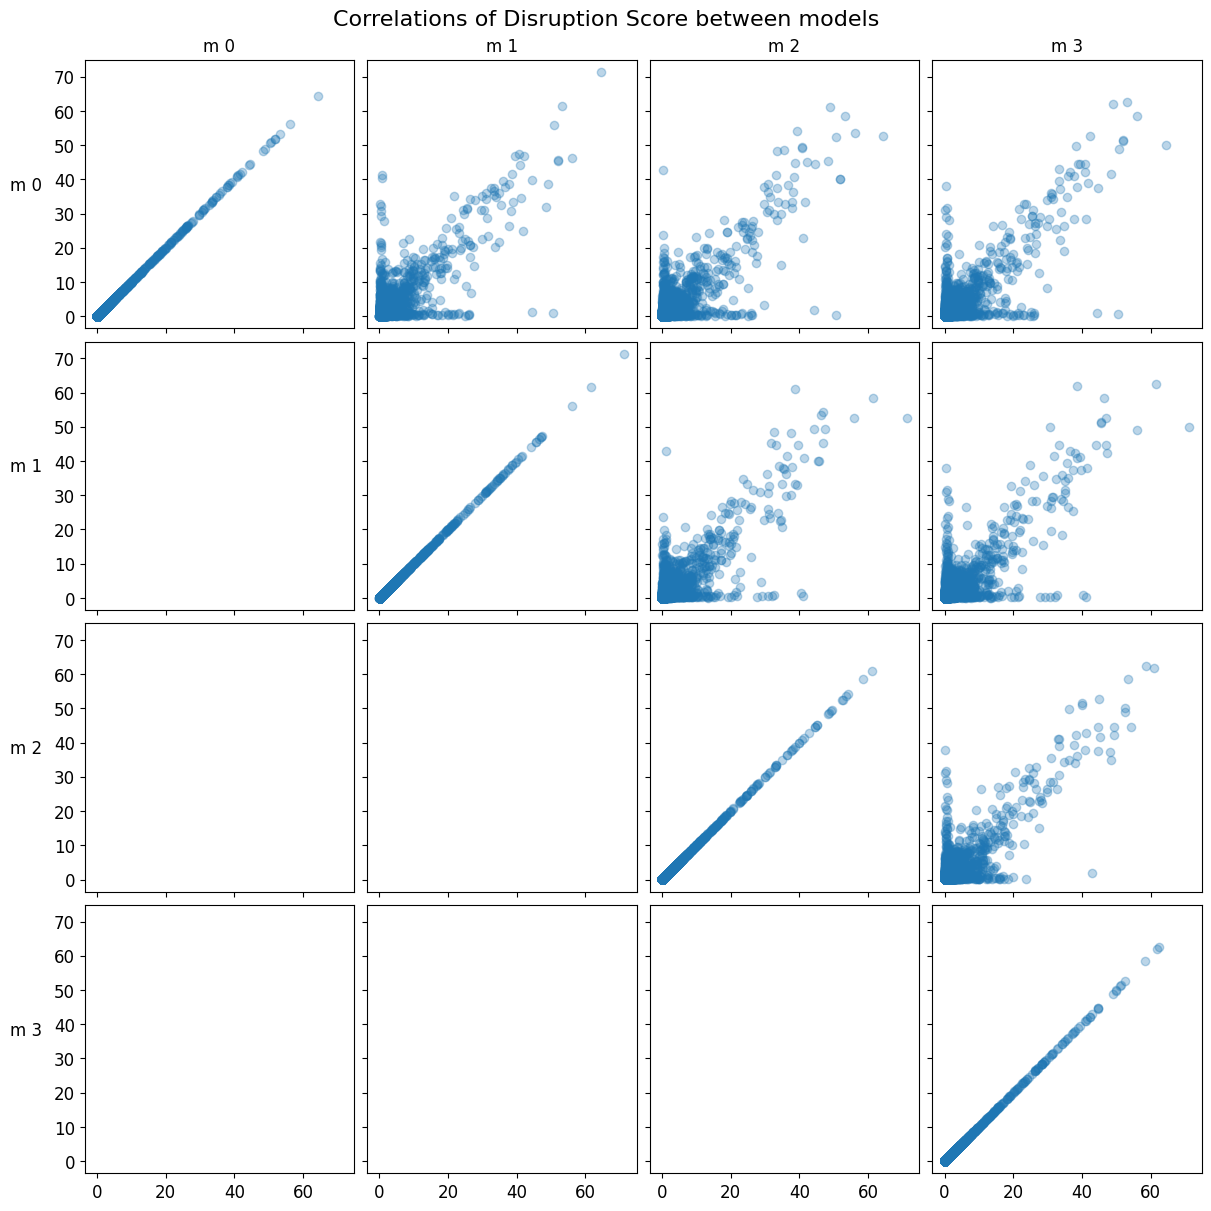

In [9]:
num_models = 4
models_corr_summary = np.zeros((num_models,num_models))

fig, axs = plt.subplots(num_models, num_models, figsize=(12, 12), sharex=True, sharey=True, layout="constrained")

for model_index_x in range(num_models):
    for model_index_y in range(num_models):
        if (model_index_y >= model_index_x):
            
            stat_x = np.array(window0[f"SCD_h{mouse_head}_m{model_index_x}_t{mouse_target}"])
            stat_y = np.array(window0[f"SCD_h{mouse_head}_m{model_index_y}_t{mouse_target}"])
            
            axs[model_index_x, model_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            models_corr_summary[model_index_x, model_index_y] = models_corr_summary[model_index_y, model_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"m {i}" for i in range(num_models)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of Disruption Score between models", fontsize=16)

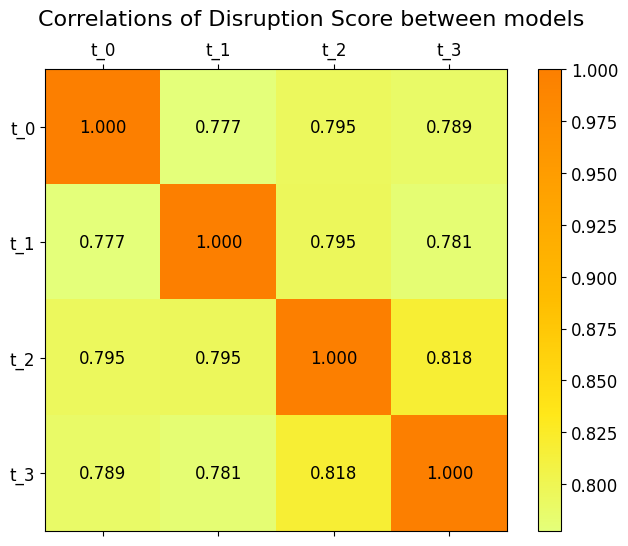

In [10]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(models_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_models)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(models_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle(f"Correlations of Disruption Score between models", fontsize=16)

fig.show()

# Taking average & comparing human vs. mouse

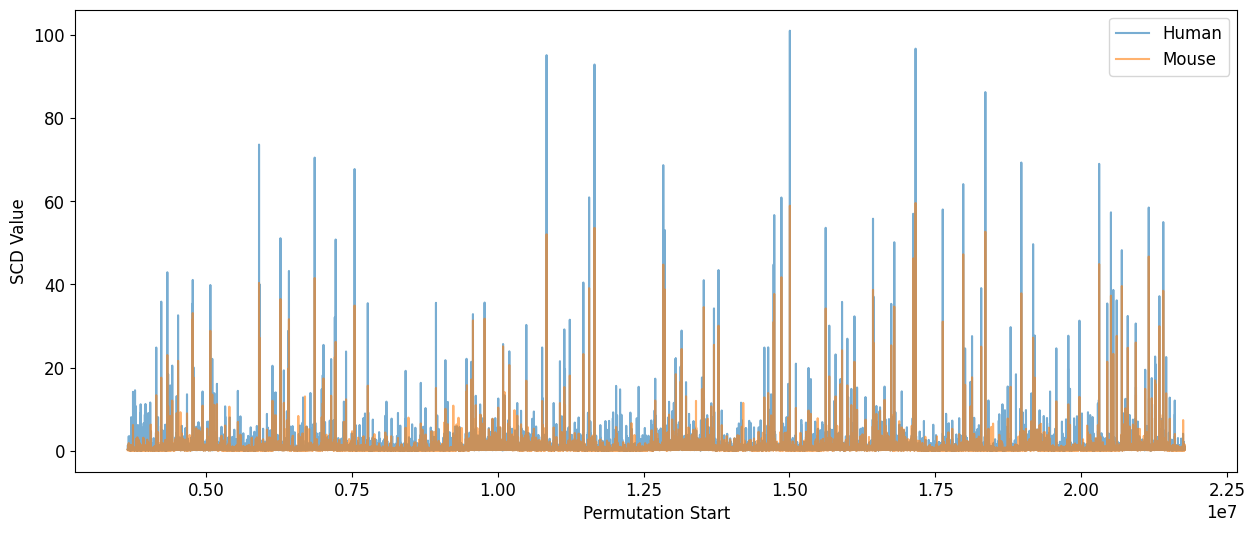

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(window0["perm_start"], window0[f"human_avg_t{human_target}"], alpha=0.6, label='Human')
plt.plot(window0["perm_start"], window0[f"mouse_avg_t{mouse_target}"], alpha=0.6, label='Mouse')

plt.xlabel("Permutation Start")
plt.ylabel("SCD Value")
plt.legend()
plt.show()

Text(0.71, 0.05, 'Pearson R = 0.9283')

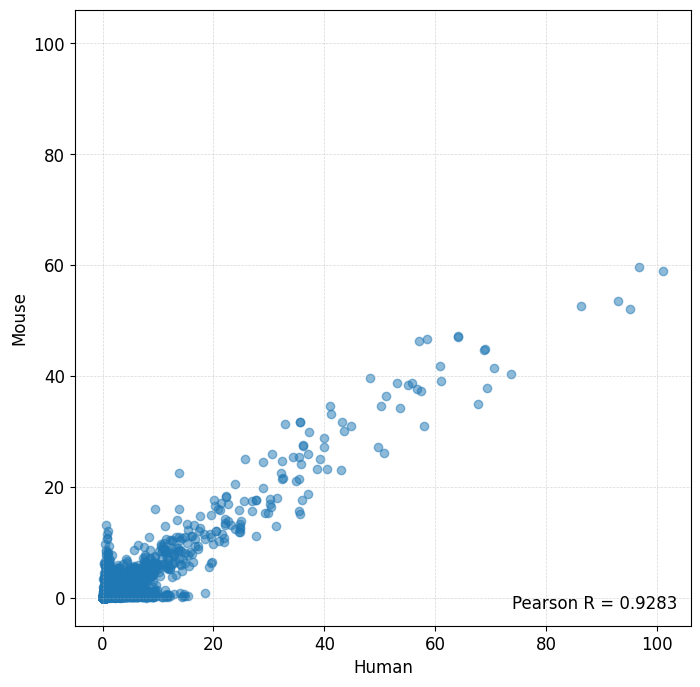

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(window0[f"human_avg_t{human_target}"], window0[f"mouse_avg_t{mouse_target}"], alpha=0.5)
perm_corr = round(stats.pearsonr(window0[f"human_avg_t{human_target}"], window0[f"mouse_avg_t{mouse_target}"]).statistic, 4)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel("Human")
plt.ylabel("Mouse")

plt.text(x=0.71, y=0.05, s=f"Pearson R = {perm_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# Taking median & comparing human vs. mouse

In [13]:
window0 = window0.copy()
window0["mouse_median"] = window0[[f"SCD_h1_m{i}_t0" for i in range(4)]].median(axis=1)
window0["human_median"] = window0[[f"SCD_h0_m{i}_t1" for i in range(4)]].median(axis=1)

Text(0.71, 0.05, 'Pearson R = 0.962')

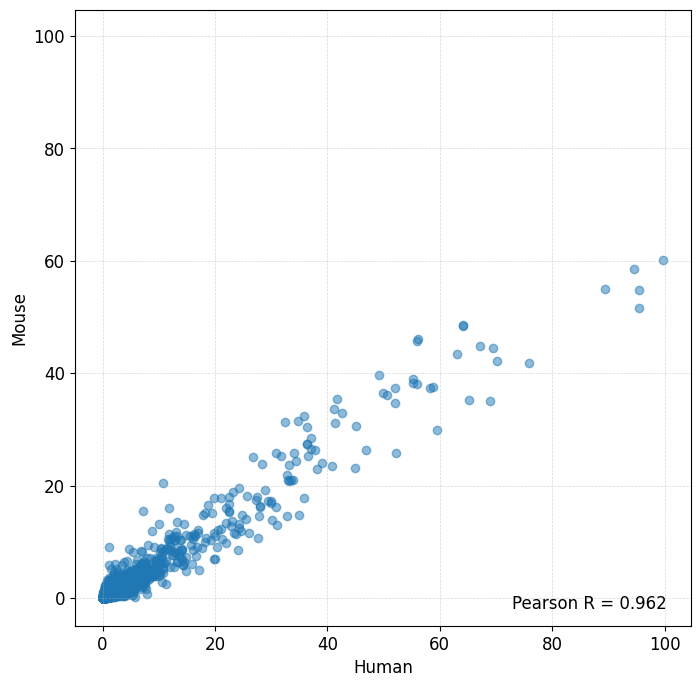

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(window0["human_median"], window0["mouse_median"], alpha=0.5)
perm_corr = round(stats.pearsonr(window0["human_median"], window0["mouse_median"]).statistic, 4)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel("Human")
plt.ylabel("Mouse")

plt.text(x=0.71, y=0.05, s=f"Pearson R = {perm_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# Comparing between independent repeats

In [15]:
from akita_utils.format_io import h5_to_df

In [16]:
mouse_m0_rep_filename = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_profile/chr1.0/chr1.0_human_m0_repeated.h5"

In [17]:
mouse_m0_rep_df = h5_to_df(mouse_m0_rep_filename, stats=["SCD"], average=False, verbose=False)

Text(0.71, 0.05, 'Pearson R = 0.8125')

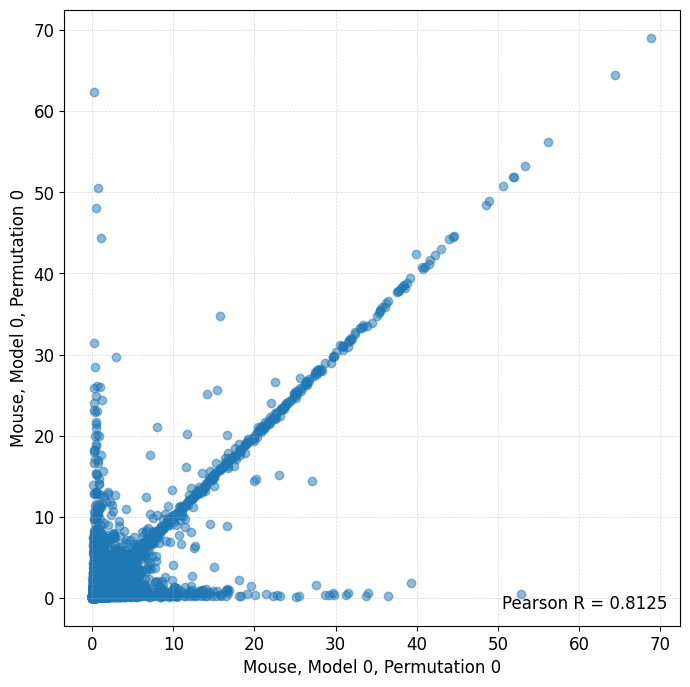

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(mouse_m0_rep_df["SCD_h1_m0_t0"], df["SCD_h1_m0_t0"], alpha=0.5)
perm_corr = round(stats.pearsonr(mouse_m0_rep_df["SCD_h1_m0_t0"], df["SCD_h1_m0_t0"]).statistic, 4)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.xlabel("Mouse, Model 0, Permutation 0")
plt.ylabel("Mouse, Model 0, Permutation 0")

plt.text(x=0.71, y=0.05, s=f"Pearson R = {perm_corr}", transform=plt.gca().transAxes, verticalalignment='top')